In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import warnings
warnings.simplefilter("ignore")

In [13]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [14]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [15]:
df.drop(columns=[col for col in ['Unnamed: 0', 'Booking_ID'] if col in df.columns], inplace=True)


In [16]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [17]:
df.shape

(29020, 18)

In [18]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [19]:
df.duplicated().sum()

7661

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(21359, 18)

In [22]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [23]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [24]:
data = df.copy()

In [25]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

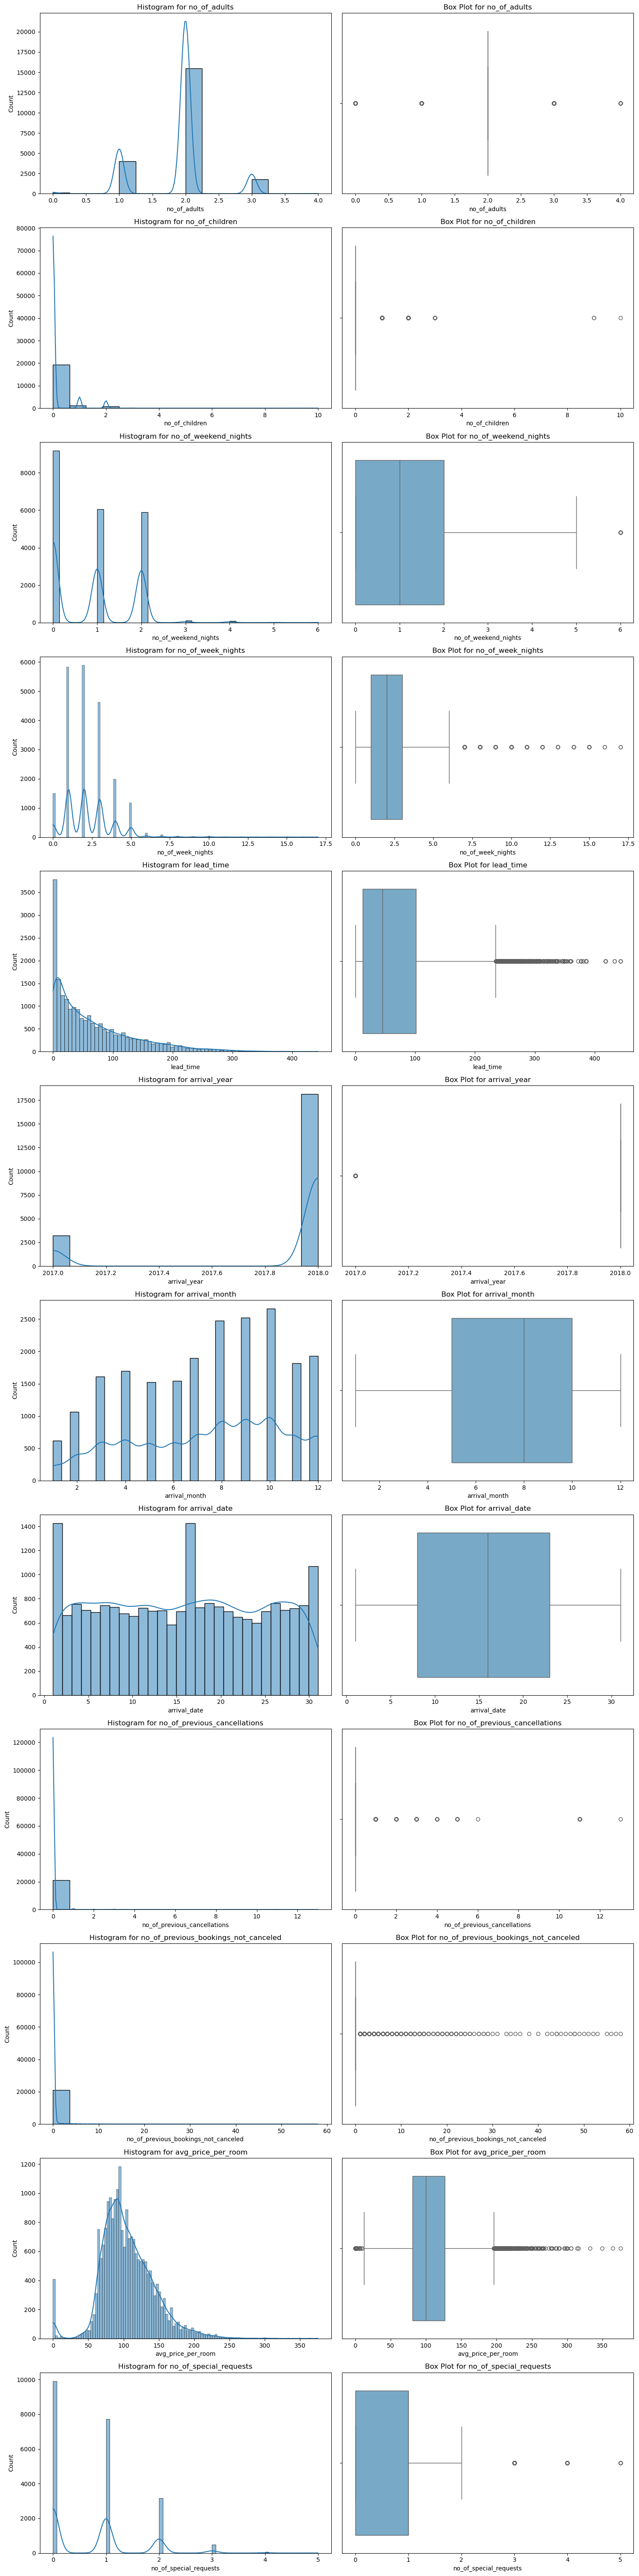

In [26]:
num_plot_dist(data , num_cols)

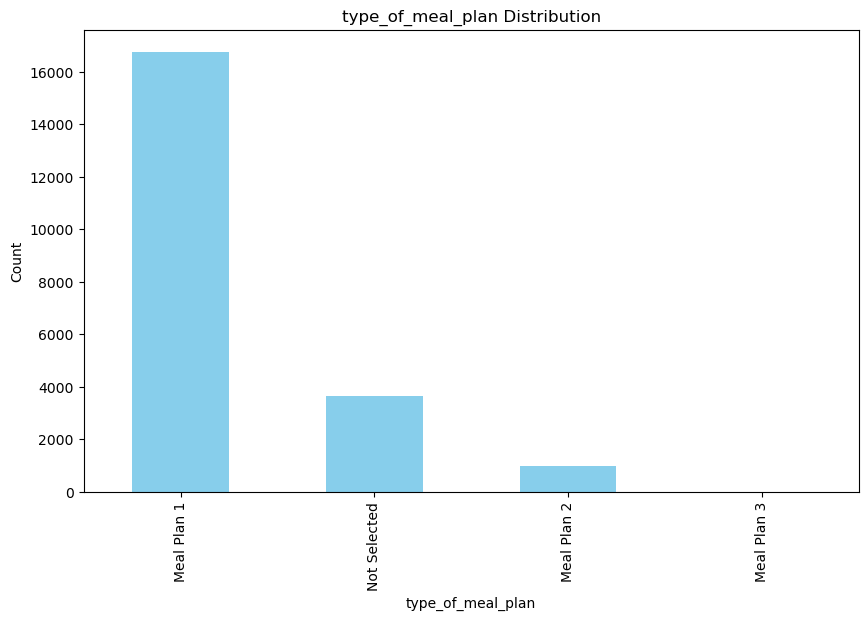

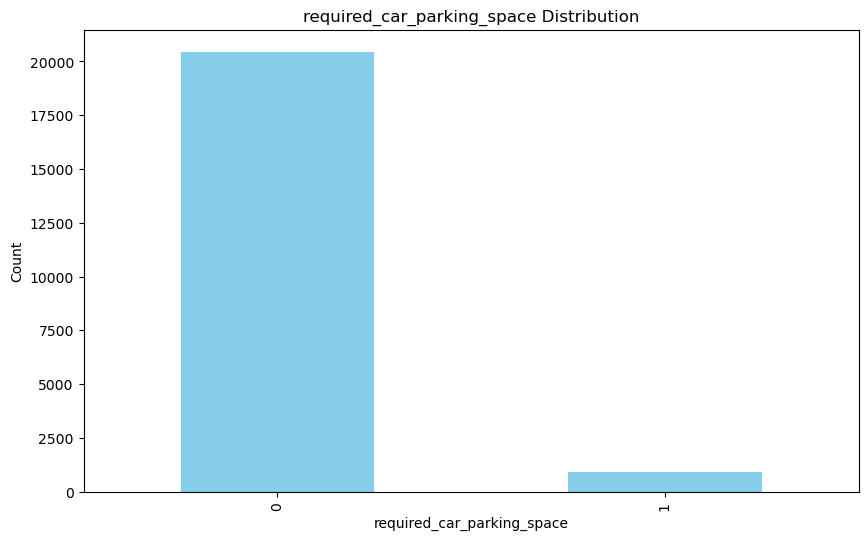

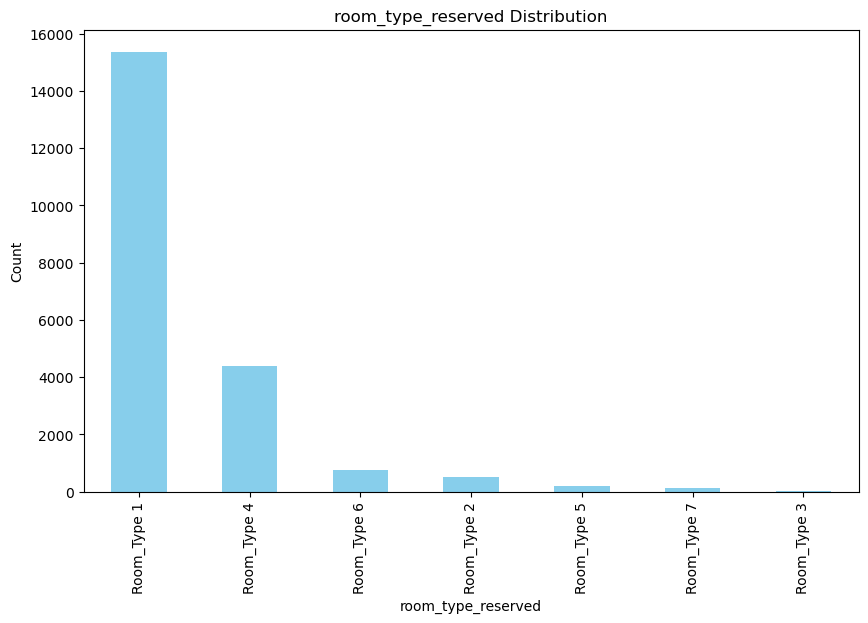

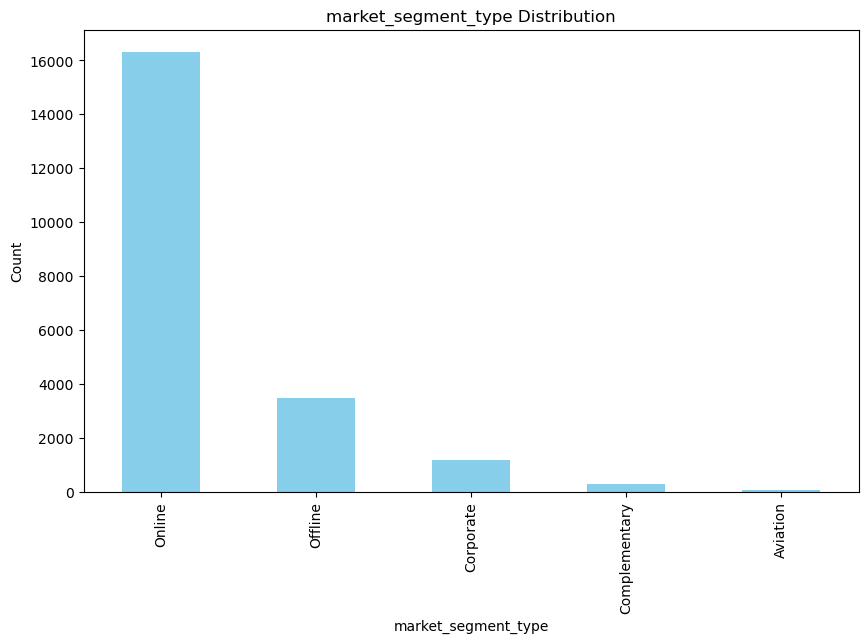

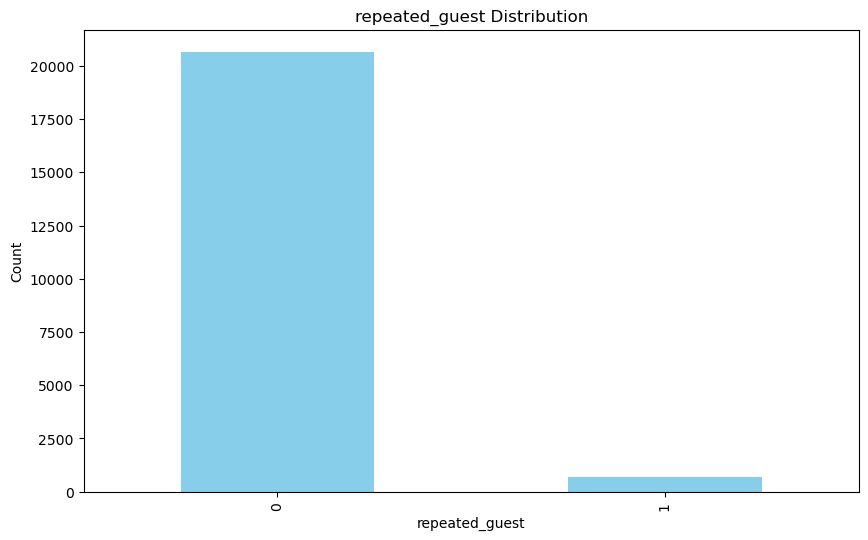

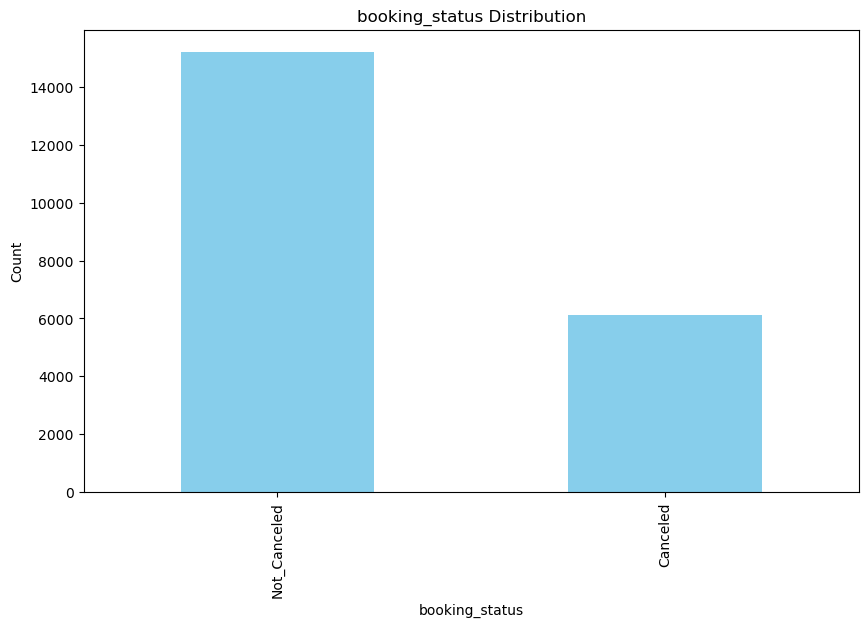

In [27]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

In [28]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

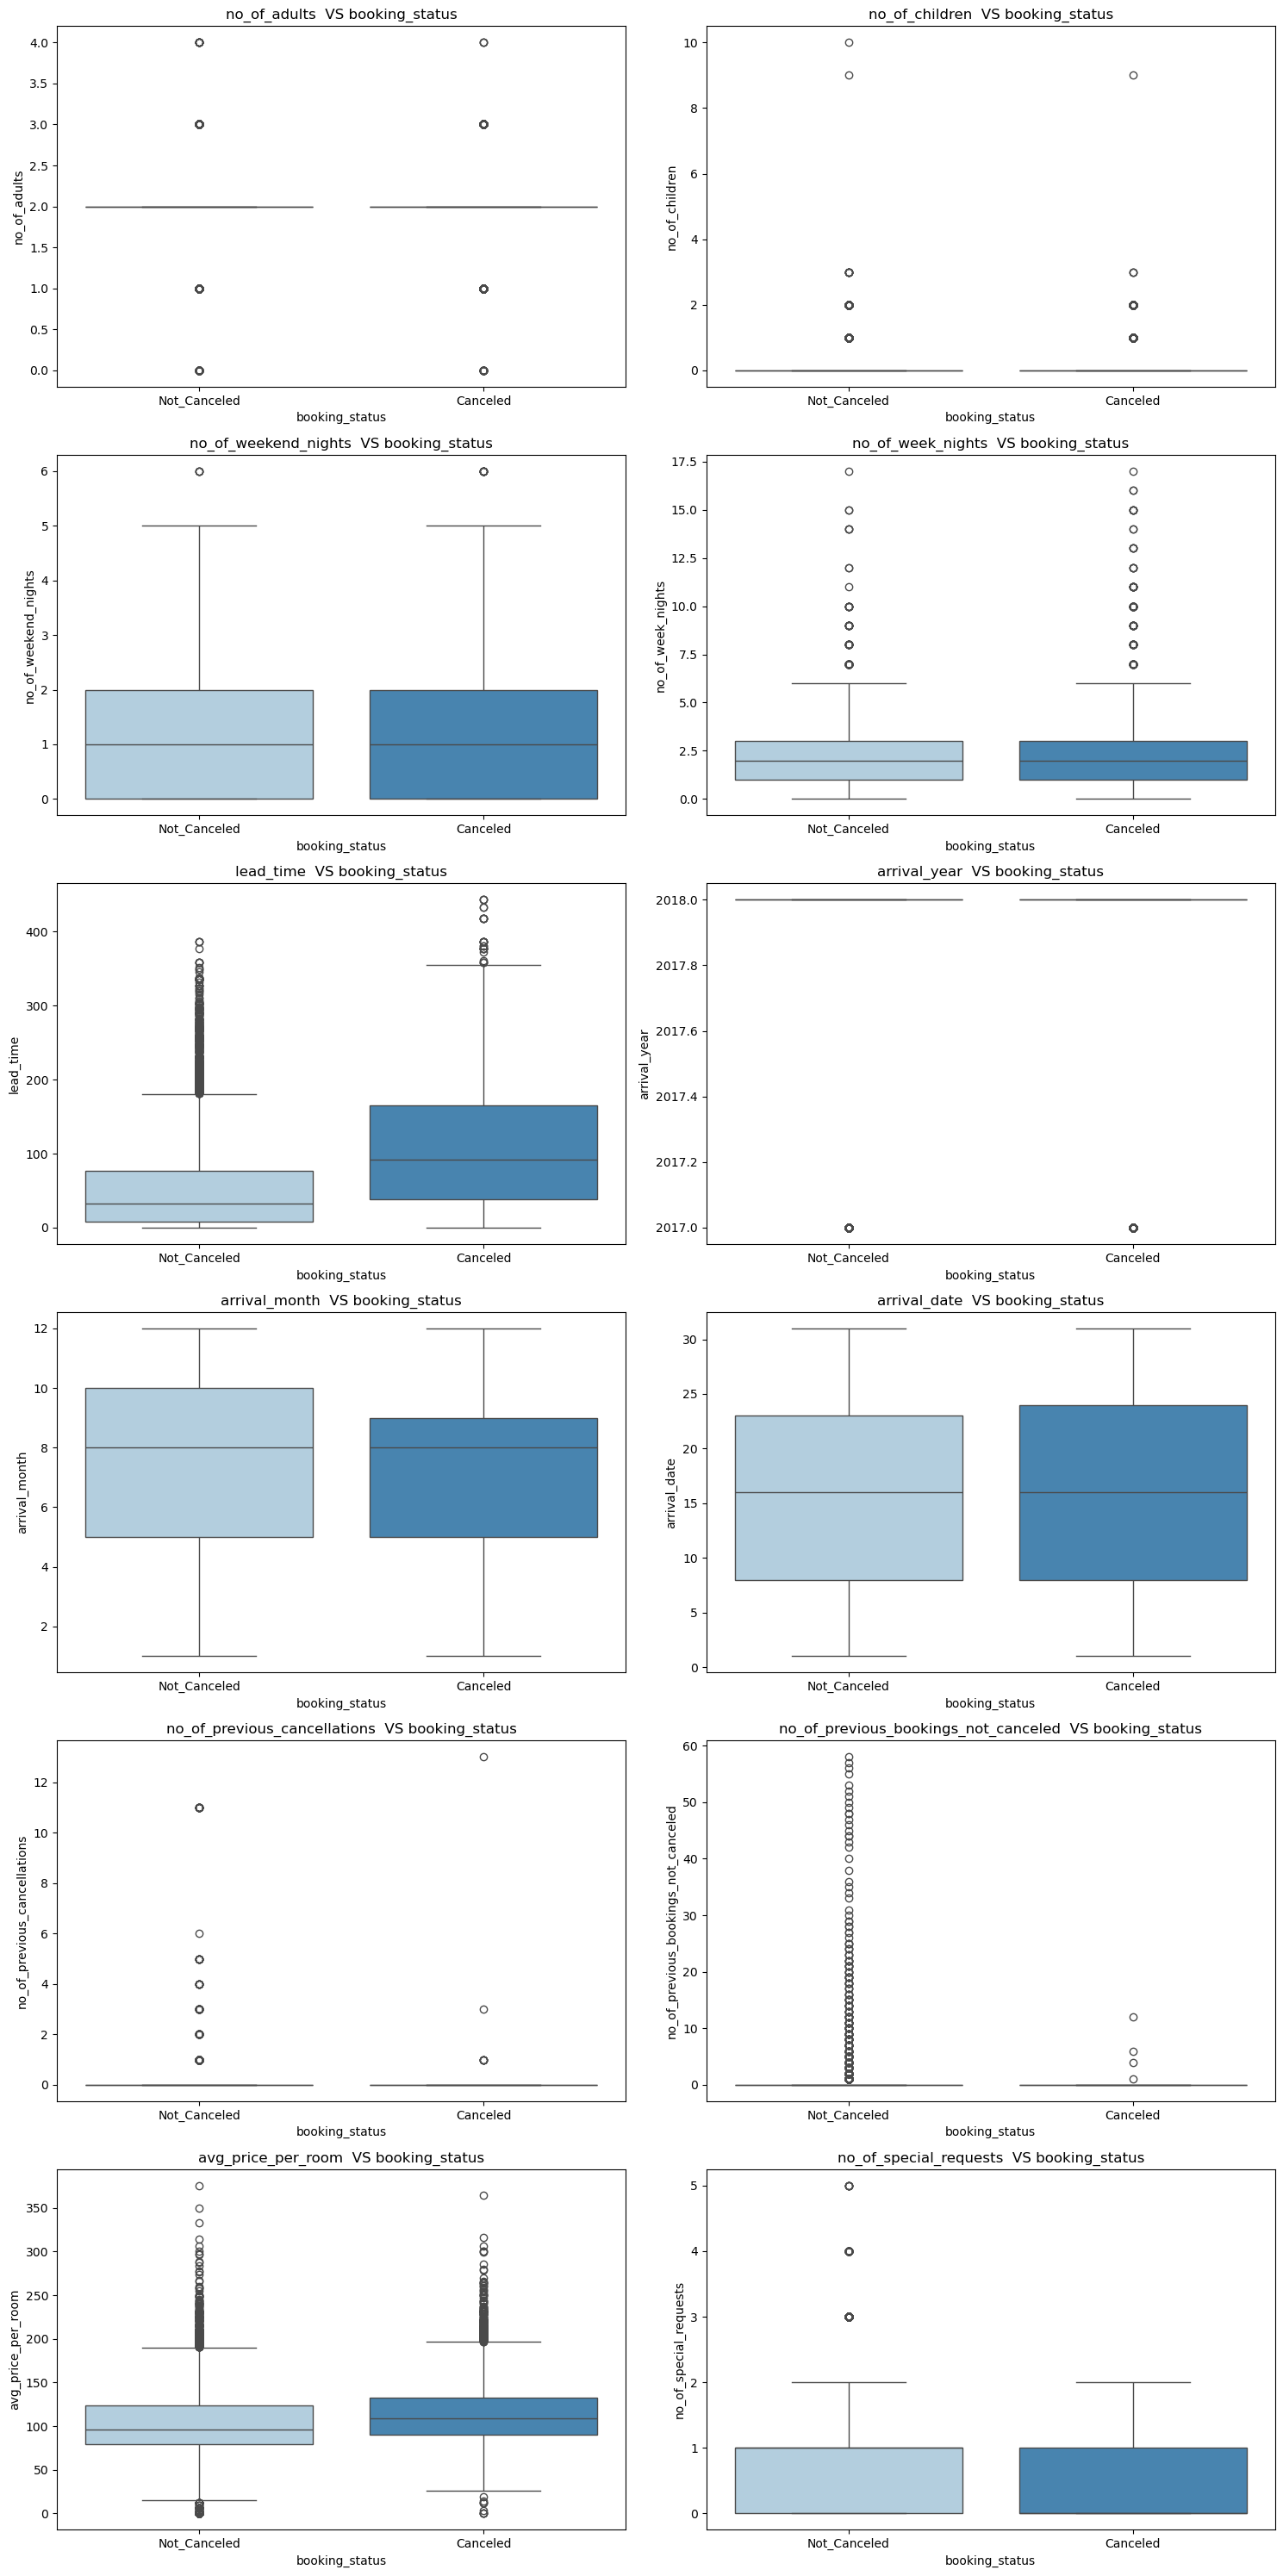

In [29]:
plot_bivariate_num(data , 'booking_status' , num_cols)

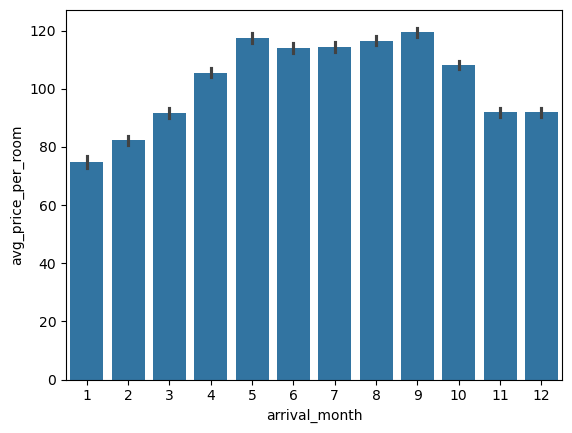

In [30]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [31]:
def plot_bivaraite_cat(df , target , cat_features):
    
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

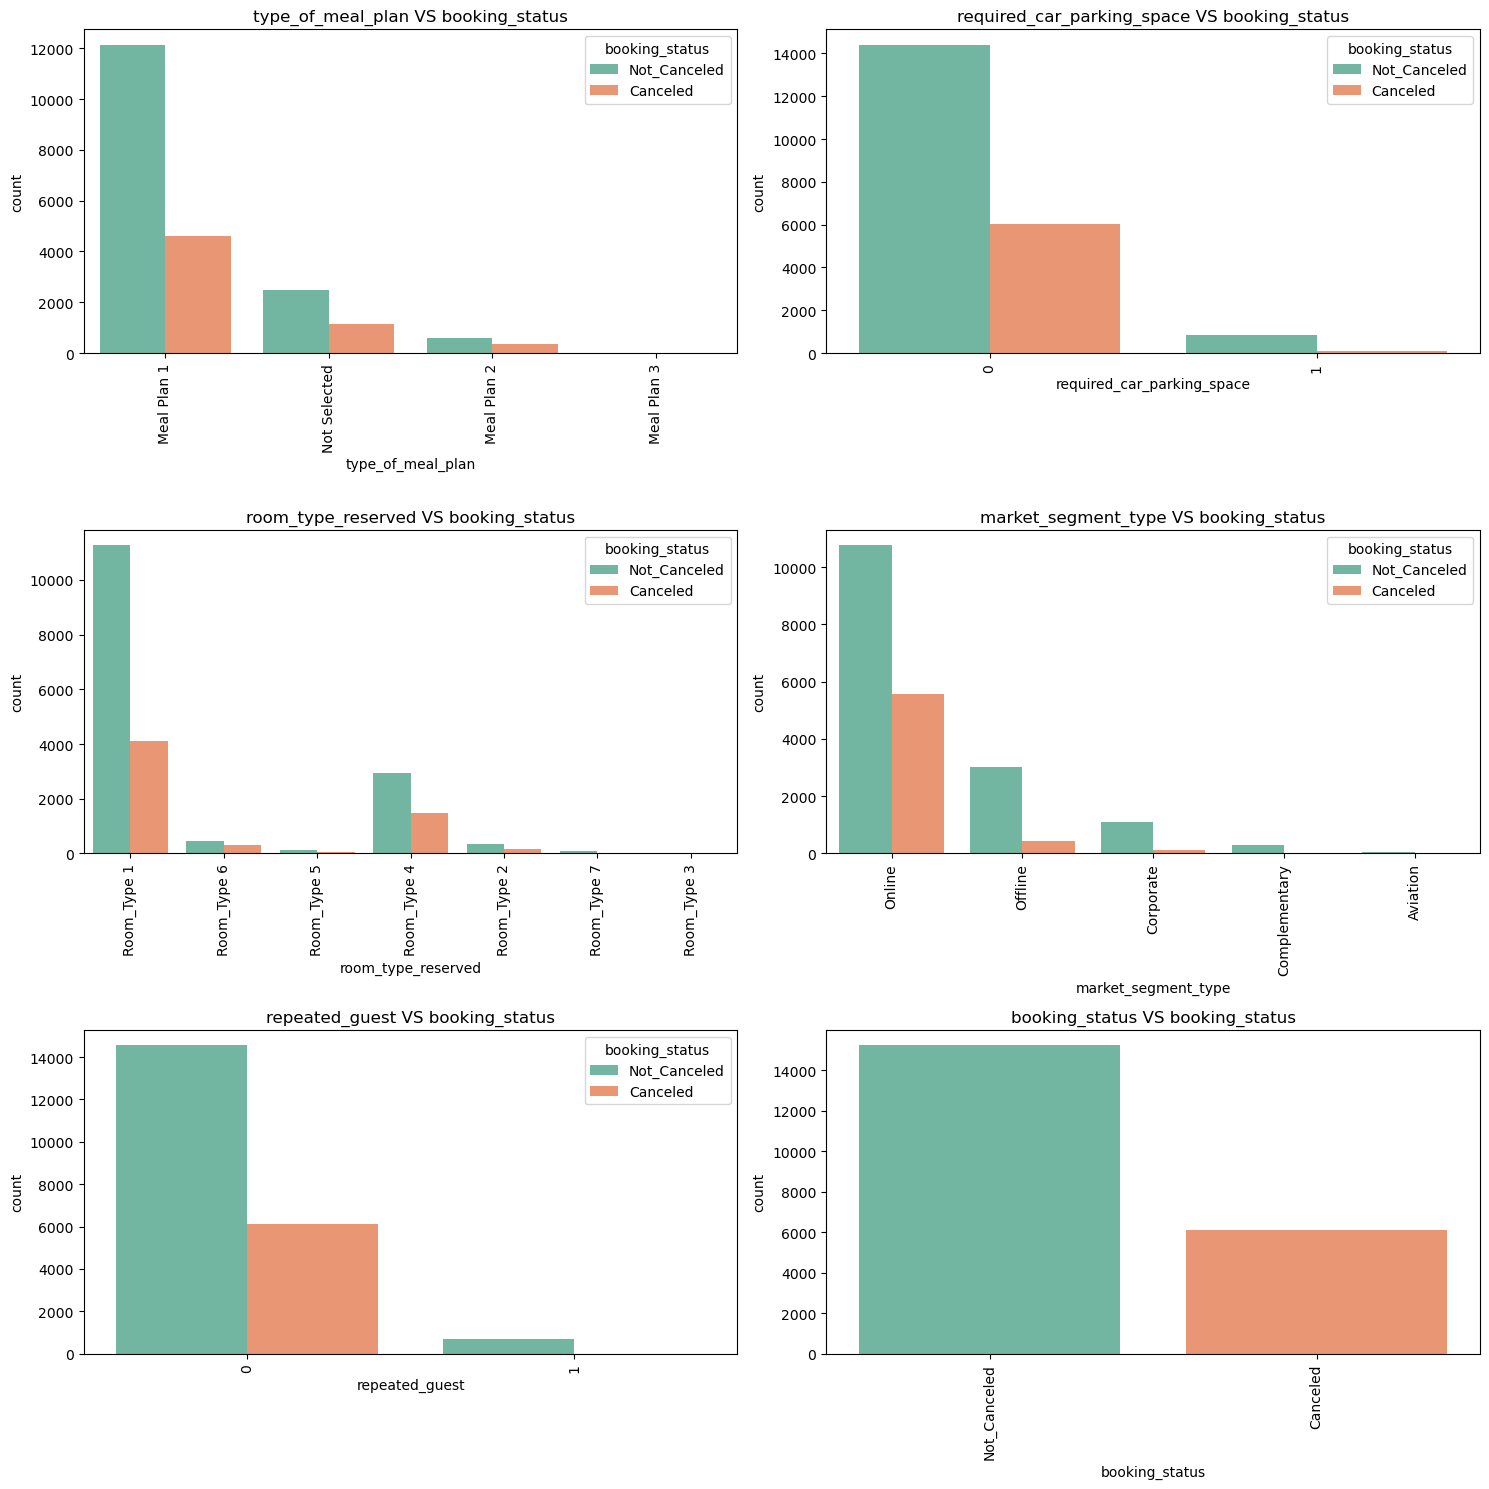

In [32]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

In [33]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}

In [35]:
!pip install statsmodels

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [37]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [38]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [39]:
corr = df.corr()

<Axes: >

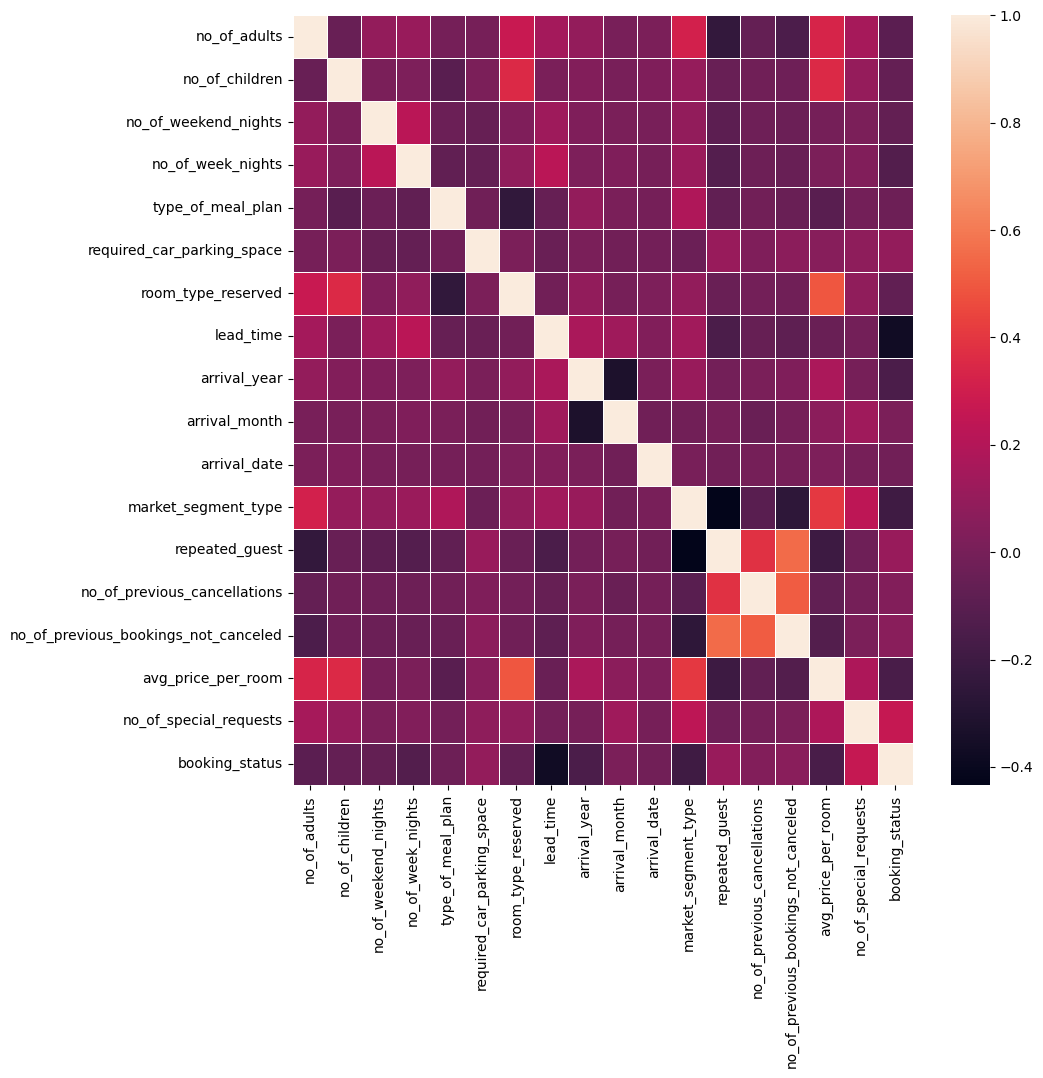

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [41]:
skewness  = df.skew()

In [42]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [43]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [44]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [45]:
!pip uninstall imbalanced-learn -y
!pip install imbalanced-learn --upgrade


Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)


In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [47]:
y_res



0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int32

In [48]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res


In [49]:
df = balanced_df.copy()

In [50]:
len(df.columns)

18

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [53]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [54]:
feature_importance = model.feature_importances_

In [55]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [56]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [57]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [58]:
df = top_10_df.copy()

In [59]:
!pip install xgboost lightgbm

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [61]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [62]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [63]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [64]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [65]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [66]:
metrics_df= pd.DataFrame(metrics)

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [68]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [69]:
rf = LGBMClassifier(random_state=42)

In [76]:
from scipy.stats import randint, uniform
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()



In [77]:
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),                   # Shallower trees often work well in LightGBM
    'num_leaves': randint(20, 150),                # Controls tree complexity
    'min_child_samples': randint(10, 100),         # Minimum samples in one leaf
    'min_child_weight': uniform(1e-3, 1),          # Minimum sum of instance weight in a child
    'subsample': uniform(0.6, 0.4),                # Also known as bagging_fraction
    'colsample_bytree': uniform(0.6, 0.4),         # Also known as feature_fraction
    'learning_rate': uniform(0.01, 0.2),
    'boosting_type': ['gbdt', 'dart'],
    'reg_alpha': uniform(0, 1),                    # L1 regularization
    'reg_lambda': uniform(0, 1),                   # L2 regularization
}

In [78]:
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [79]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Info] Number of positive: 9728, number of negative: 9767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 19495, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499000 -> initscore=-0.004001
[LightGBM] [Info] Start training from score -0.004001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=5,
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B0FA38AAE0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B0FA24A3C0>,
                                        'max_depth': <scipy.stats._distn_infr...
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B093837530>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B082E59AC0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B093869130>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B093836930>},
                   random_state=42, scoring='accuracy', verbose=2)

In [80]:
random_search.best_params_

{'boosting_type': 'dart',
 'colsample_bytree': 0.6964101864104046,
 'learning_rate': 0.14665270376509165,
 'max_depth': 14,
 'min_child_samples': 17,
 'min_child_weight': 0.035388521115218396,
 'n_estimators': 305,
 'num_leaves': 100,
 'reg_alpha': 0.2587799816000169,
 'reg_lambda': 0.662522284353982,
 'subsample': 0.7246844304357644}

In [81]:
best_rf_model = random_search.best_estimator_

In [82]:
y_pred = best_rf_model.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [85]:
import joblib

In [86]:
joblib.dump(best_rf_model,"lgbm_model.pkl")

['lgbm_model.pkl']

In [87]:
loaded_model=joblib.load("lgbm_model.pkl")

In [88]:
joblib.dump(best_rf_model,"lgbm_model.pkl")

['lgbm_model.pkl']